**IMPORTING LIBRARIES**

In [1]:
# ***--------------------------------------------------------------***
# 1. IMPORT LIBRARIES
# ***--------------------------------------------------------------***
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualization
import calendar  # Month names
import warnings  # Ignore warnings
warnings.filterwarnings('ignore')  # Suppress warnings

from sklearn.model_selection import train_test_split  # Split data
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.linear_model import LogisticRegression  # ML model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # ML models
from xgboost import XGBClassifier  # ML model
from sklearn.tree import DecisionTreeClassifier  # ML model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score  # Evaluation metrics
import pickle  # Save models/scalers


**LOADING DATASETS**

In [10]:
# ***--------------------------------------------------------------***
# 2. LOAD DATASET
# ***--------------------------------------------------------------***
df = pd.read_csv(r'C:\Users\USER\Desktop\main_projects\weather forecast high uv\Nairobi Kenya weather forecast.csv')  # Load CSV
df.head() # Display first few rows
  

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Nairobi, Kenya",2024-05-14,77.2,61.0,68.9,77.2,61.0,68.9,58.3,70.8,...,20.2,8,10,2024-05-14T06:27:20,2024-05-14T18:30:53,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,HKNW,63740099999,63742099999"
1,"Nairobi, Kenya",2024-05-15,78.0,62.6,69.4,78.0,62.6,69.4,59.1,71.3,...,19.9,7,10,2024-05-15T06:27:22,2024-05-15T18:30:53,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,HKNW,63740099999,63742099999"
2,"Nairobi, Kenya",2024-05-16,79.6,61.0,68.4,79.6,61.0,68.4,59.5,75.1,...,18.2,7,10,2024-05-16T06:27:24,2024-05-16T18:30:53,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"HKJK,63741099999,HKNW,63740099999,63742099999"
3,"Nairobi, Kenya",2024-05-17,78.8,60.1,68.7,78.8,60.1,68.7,60.4,76.7,...,19.1,8,10,2024-05-17T06:27:27,2024-05-17T18:30:54,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"HKJK,63741099999,HKNW,63740099999,63742099999"
4,"Nairobi, Kenya",2024-05-18,79.1,62.4,69.9,79.1,62.4,69.9,60.6,74.2,...,19.9,8,10,2024-05-18T06:27:31,2024-05-18T18:30:55,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,remote,HKNW,63740099999,63742..."


In [11]:
df.info()  # Check data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        264 non-null    object 
 14  snow              366 non-null    int64  
 15  snowdepth         366 non-null    int64  
 16  windgust          366 non-null    float64
 1

**DATA CLEANING**

In [12]:
# ***--------------------------------------------------------------***
# 3. DATA CLEANING
# ***--------------------------------------------------------------***

# Convert datetime columns to datetime type
cols = ['datetime', 'sunrise', 'sunset']
for col in cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert and coerce errors

# Fill missing precipitation types
df['preciptype'] = df['preciptype'].fillna('None')  # Replace NaN with 'None'


**NUMERICAL COLUMN DISTRIBUTION**

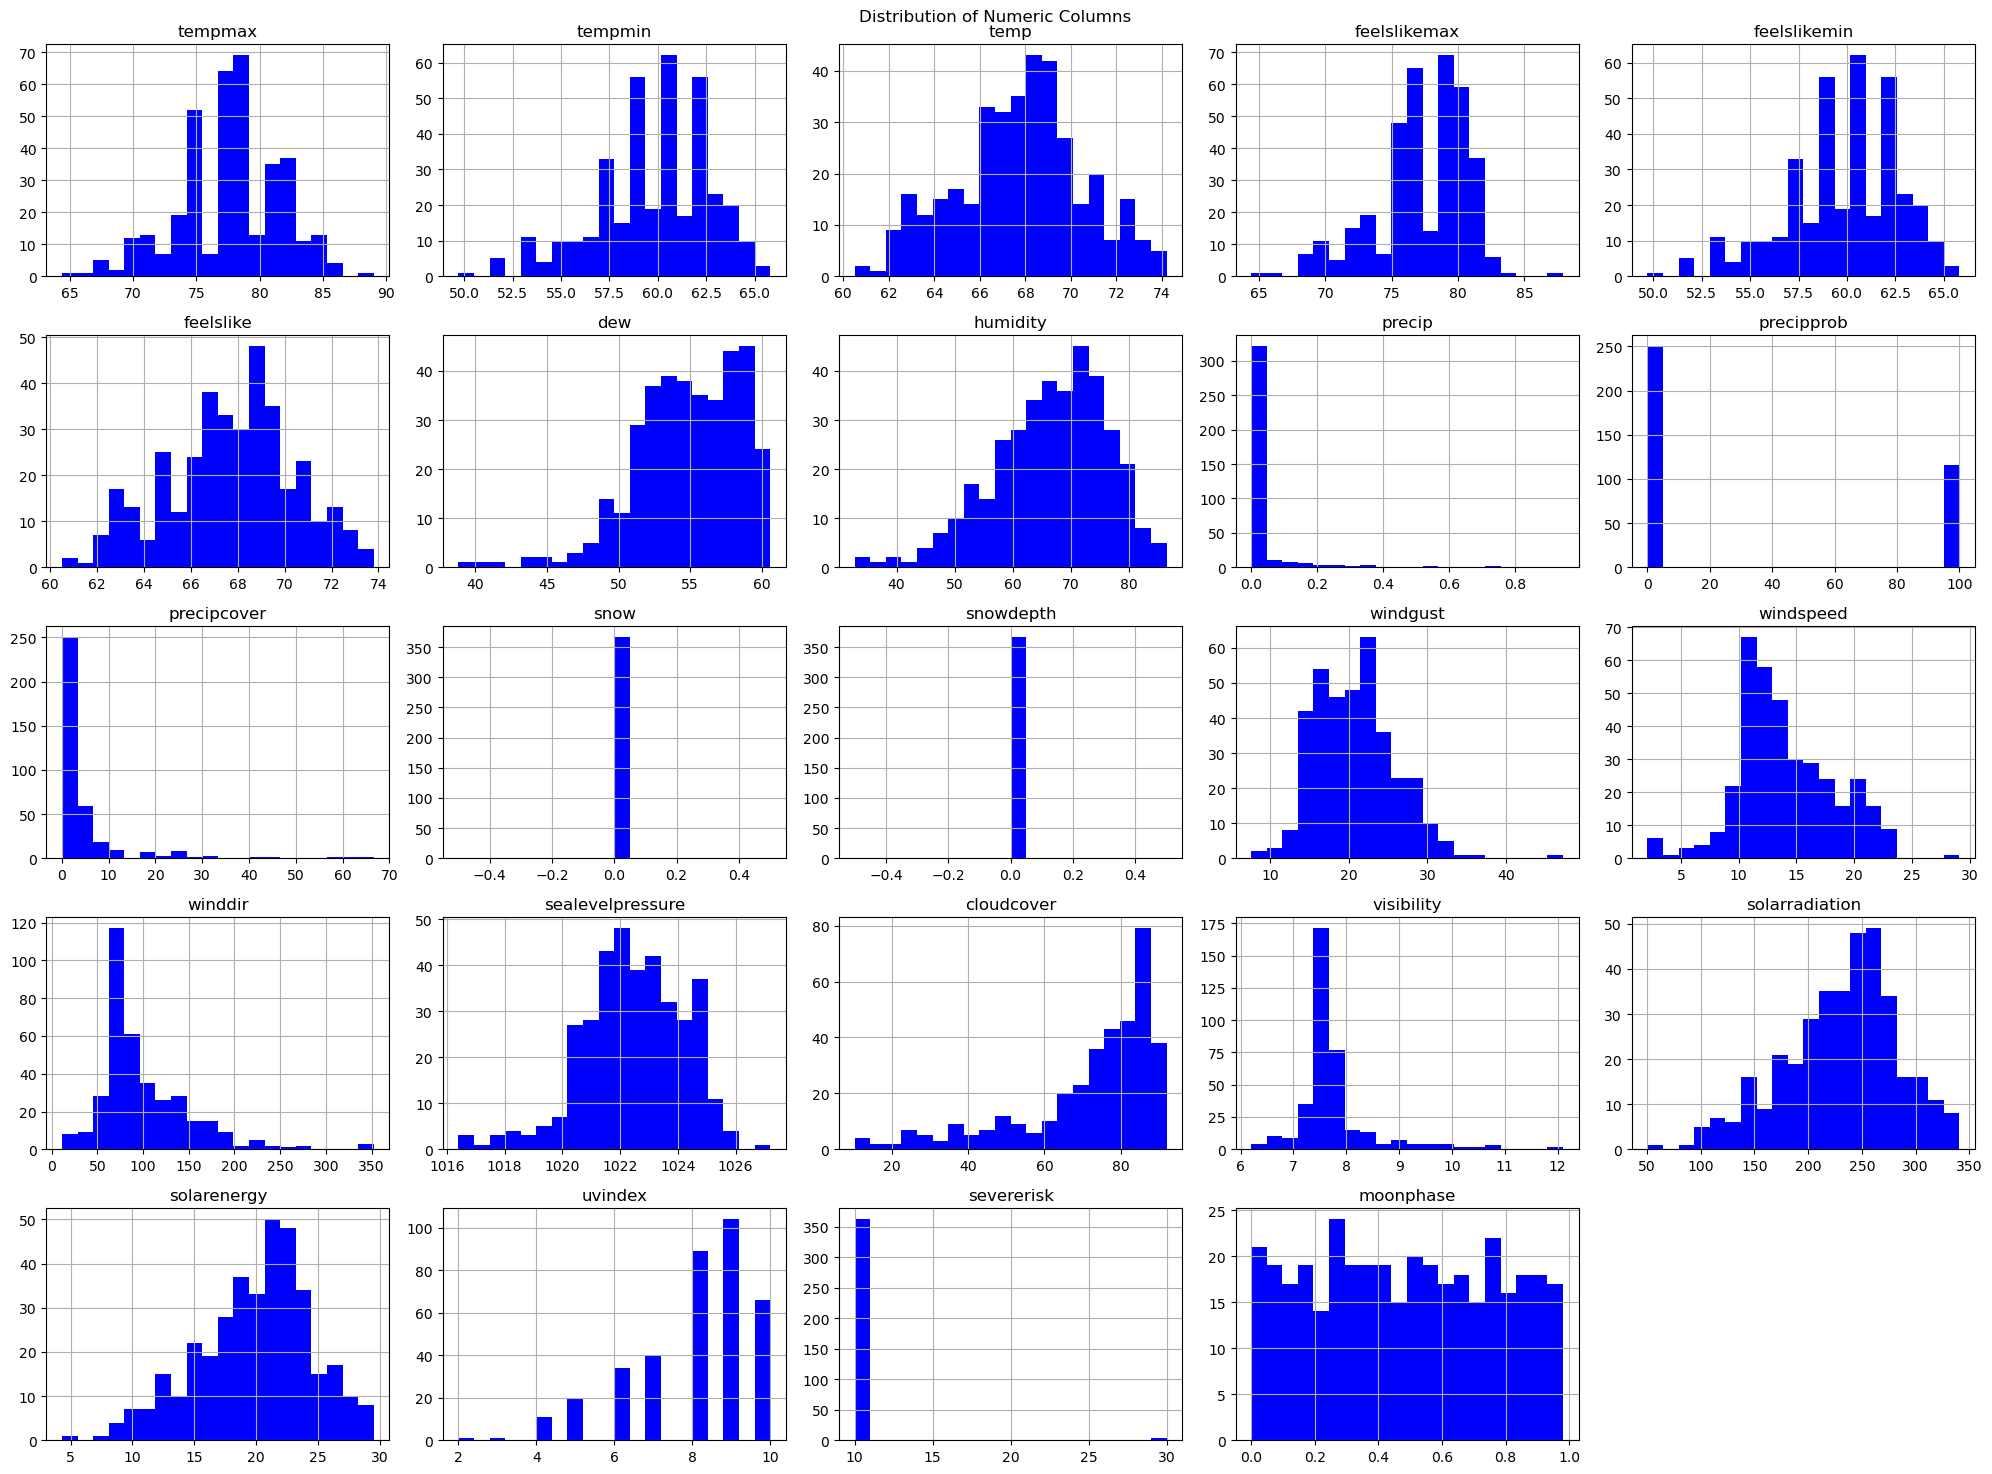

In [5]:
# ***--------------------------------------------------------------***
# 4.1 NUMERIC COLUMN DISTRIBUTION
# ***--------------------------------------------------------------***
numeric_col = df.select_dtypes(include=['int', 'float']).columns  # Select numeric columns
df[numeric_col].hist(bins=20, figsize=(20,15), color = 'blue')  # Plot histograms
plt.suptitle('Distribution of Numeric Columns')
plt.tight_layout()
plt.show()


**CATEGORICAL VARIABLES COUNTPLOTS**

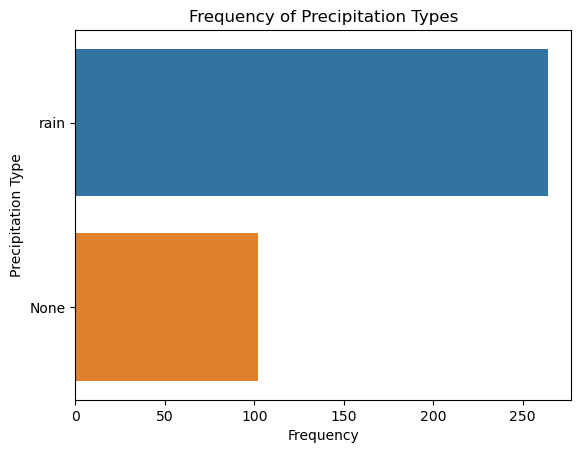

In [13]:
# ***--------------------------------------------------------------***
# 4.2 CATEGORICAL VARIABLES FREQUENCY
# ***--------------------------------------------------------------***
sns.countplot(data=df, y='preciptype', hue='preciptype')  # Frequency of precipitation types
plt.title('Frequency of Precipitation Types')
plt.xlabel('Frequency')
plt.ylabel('Precipitation Type')
plt.show()




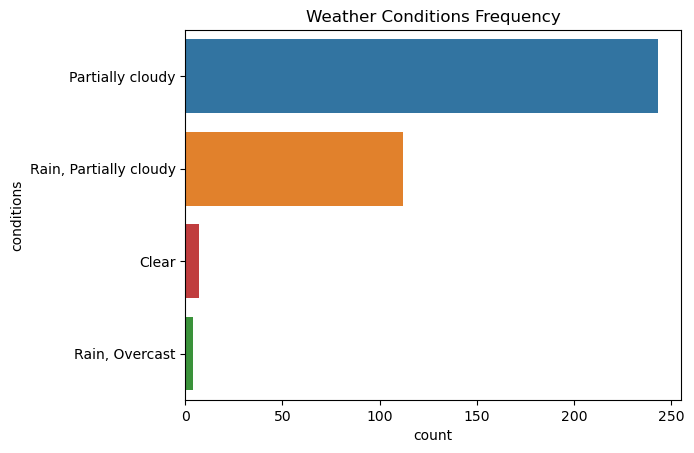

In [ ]:
sns.countplot(data=df, y='conditions', order=df['conditions'].value_counts(ascending=False).index, hue='conditions')  # Frequency of conditions
plt.title('Weather Conditions Frequency')
plt.show()


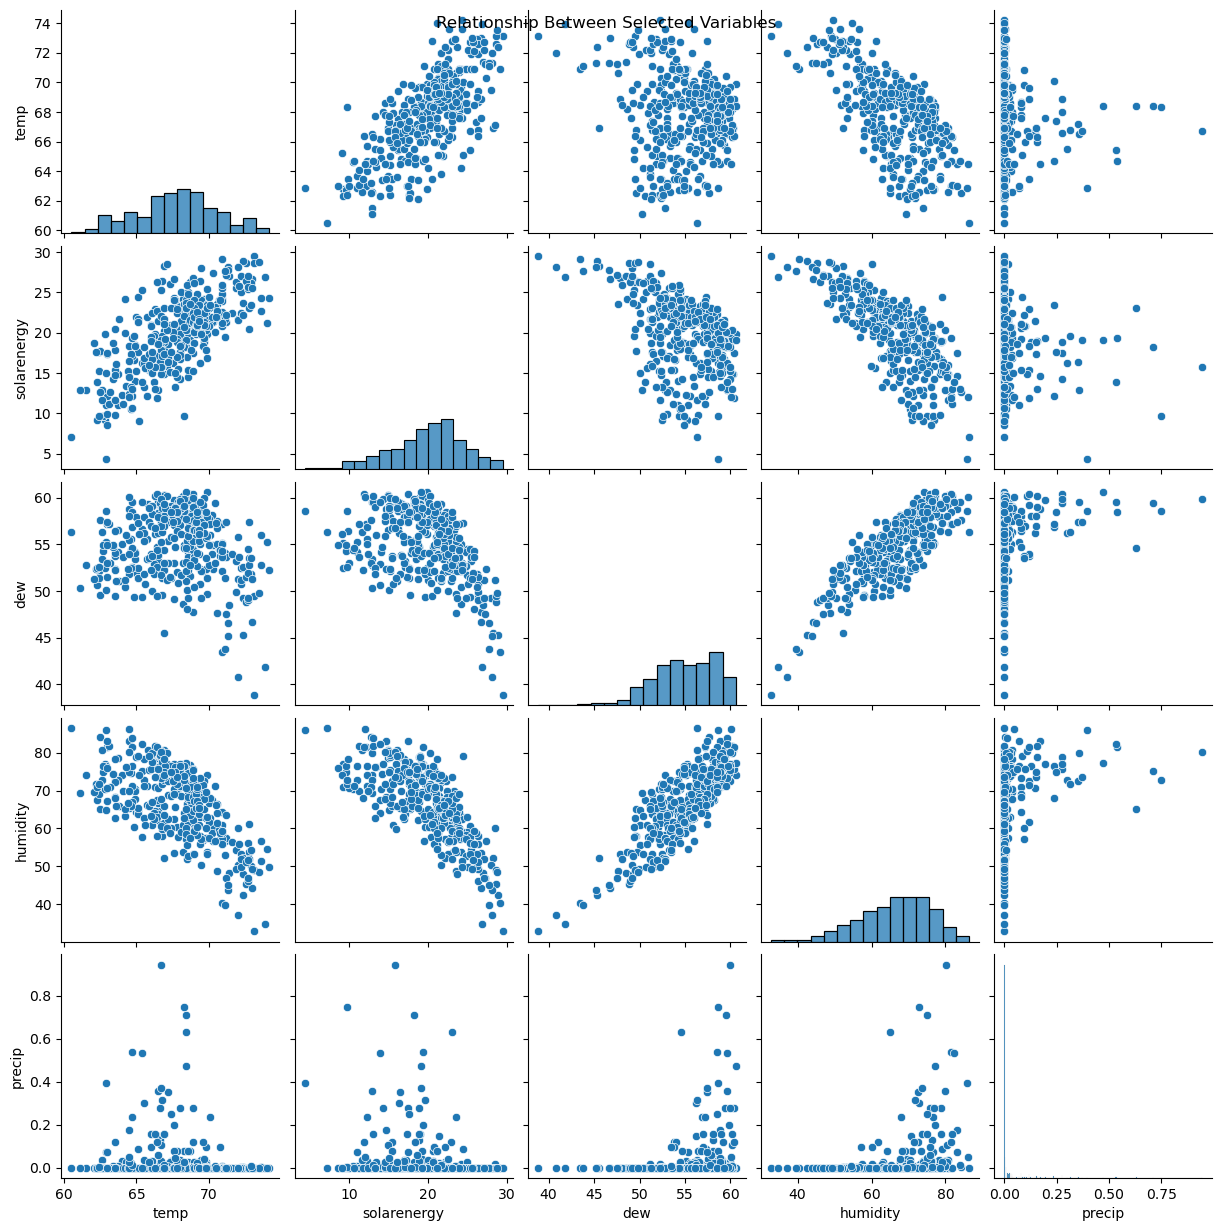

In [15]:
# ***--------------------------------------------------------------***
# 4.3 RELATIONSHIP BETWEEN VARIABLES
# ***--------------------------------------------------------------***
sns.pairplot(df[['temp', 'solarenergy', 'dew', 'humidity', 'precip']])  # Pairplot for numeric variables
plt.suptitle('Relationship Between Selected Variables')
plt.show()


**DAILY TRENDS**

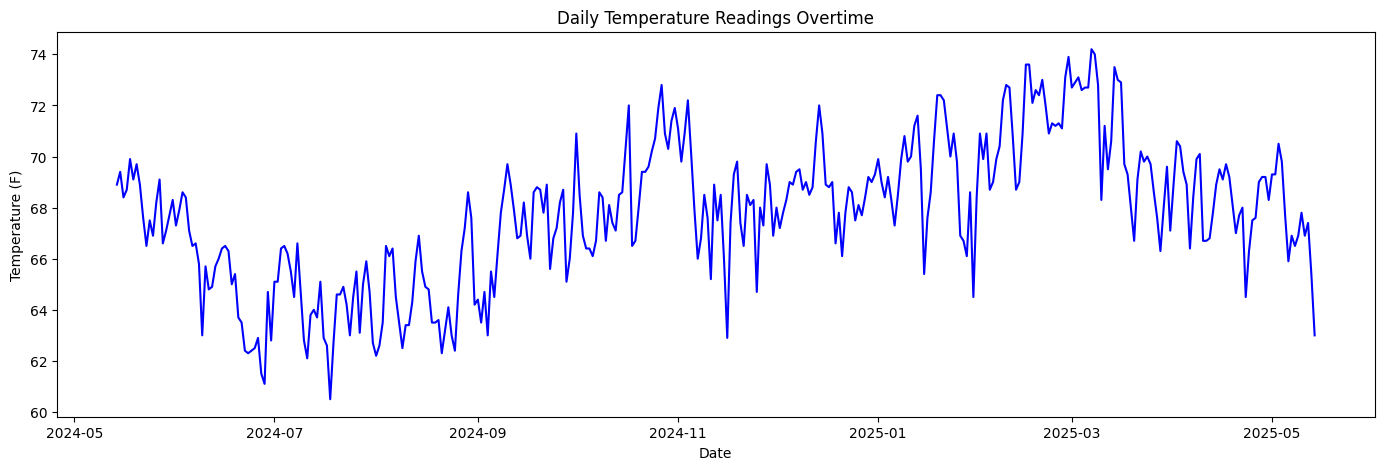

In [ ]:
plt.figure(figsize = (17, 5))
sns.lineplot(data = df, x = 'datetime', y = 'temp', c = 'blue')    # temperature over time
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Daily Temperature Readings Overtime')
plt.show()


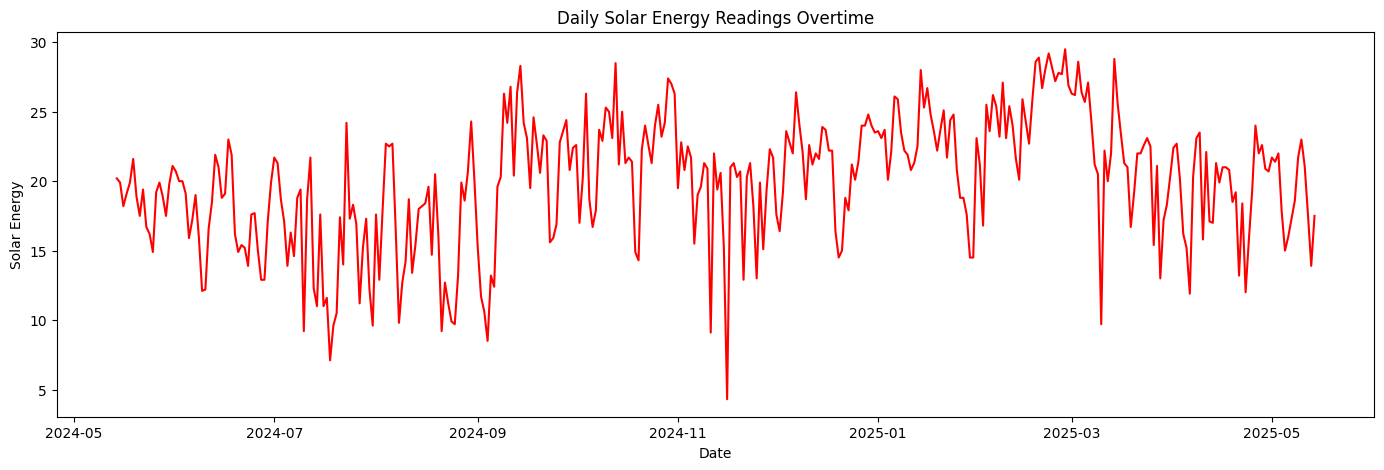

In [ ]:
plt.figure(figsize = (17, 5))
sns.lineplot(data = df, x = 'datetime', y = 'solarenergy', c = 'red')   # solar energy over time
plt.xlabel('Date')
plt.ylabel('Solar Energy')
plt.title('Daily Solar Energy Readings Overtime')
plt.show()


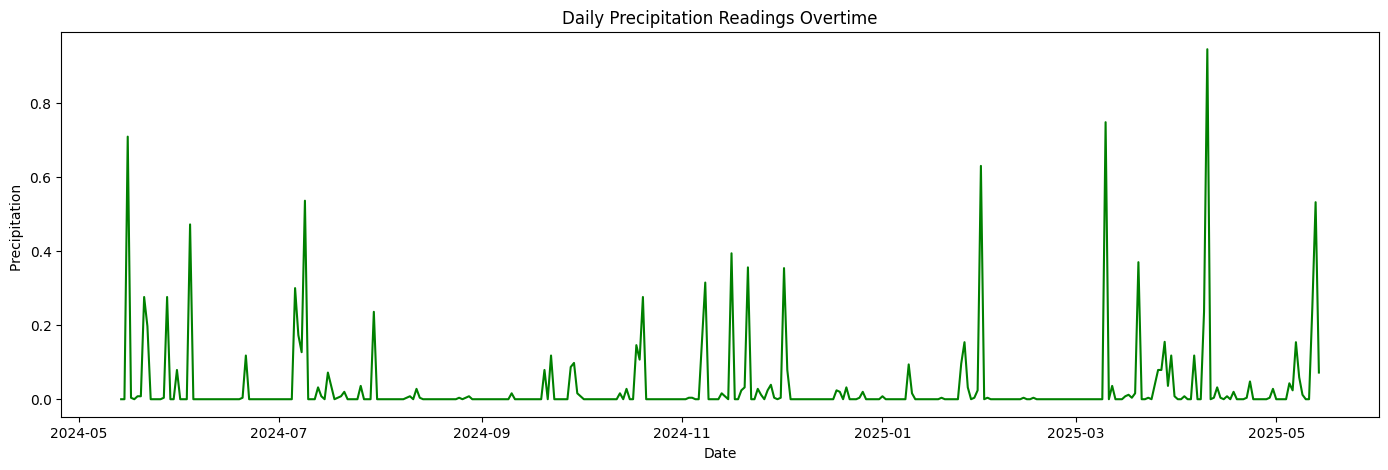

In [ ]:
plt.figure(figsize = (17, 5))
sns.lineplot(data = df, x = 'datetime', y = 'precip', c = 'green')  # precipitation over time
plt.xlabel('Date')
plt.ylabel('Precipitation ')
plt.title('Daily Precipitation Readings Overtime')
plt.show()


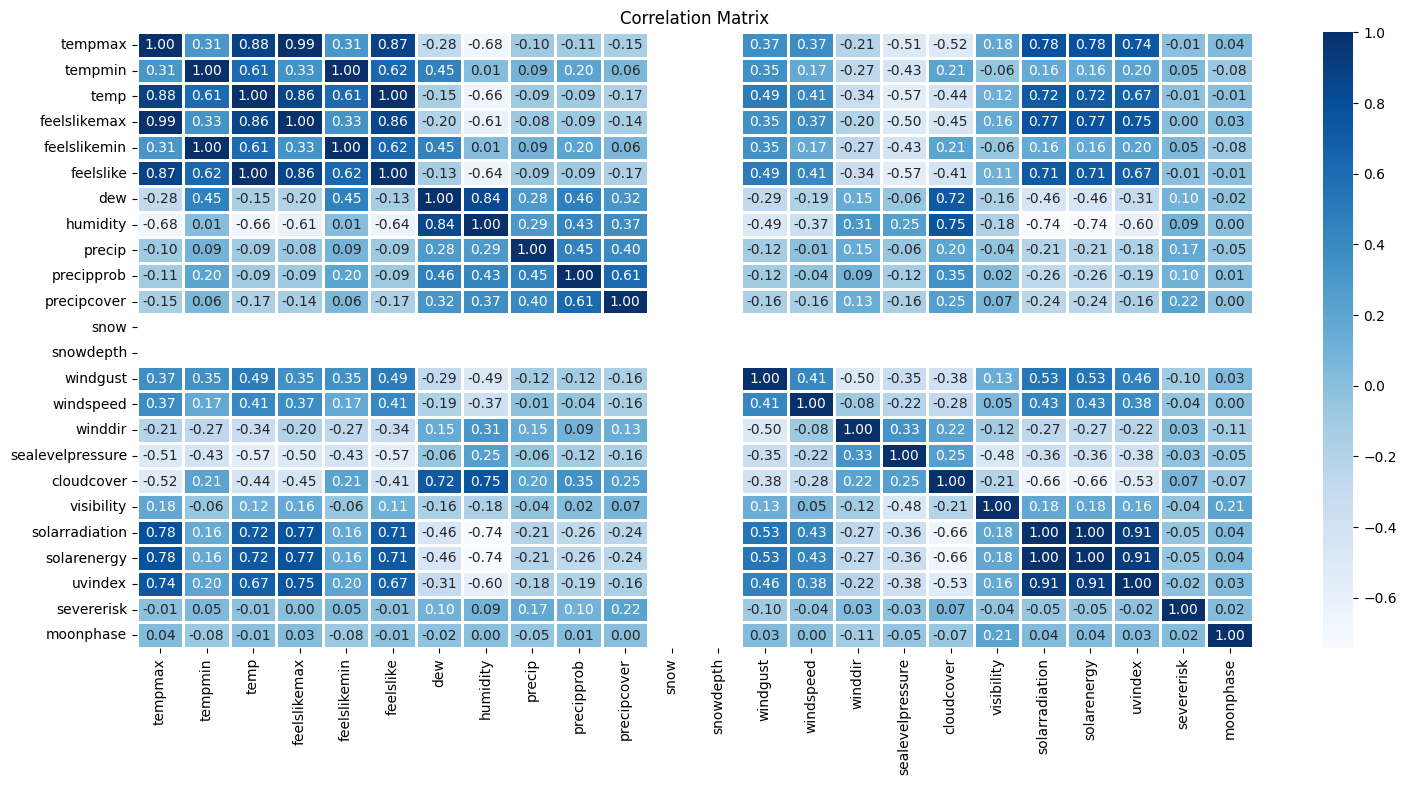

In [ ]:
corrs = df.select_dtypes(include='number').corr()    # Correlation matrix for numeric variables
plt.figure(figsize = (18, 8))
sns.heatmap(corrs, annot = True, fmt = '.2f', cmap = 'Blues',lw=1)
plt.title('Correlation Matrix')
plt.show()


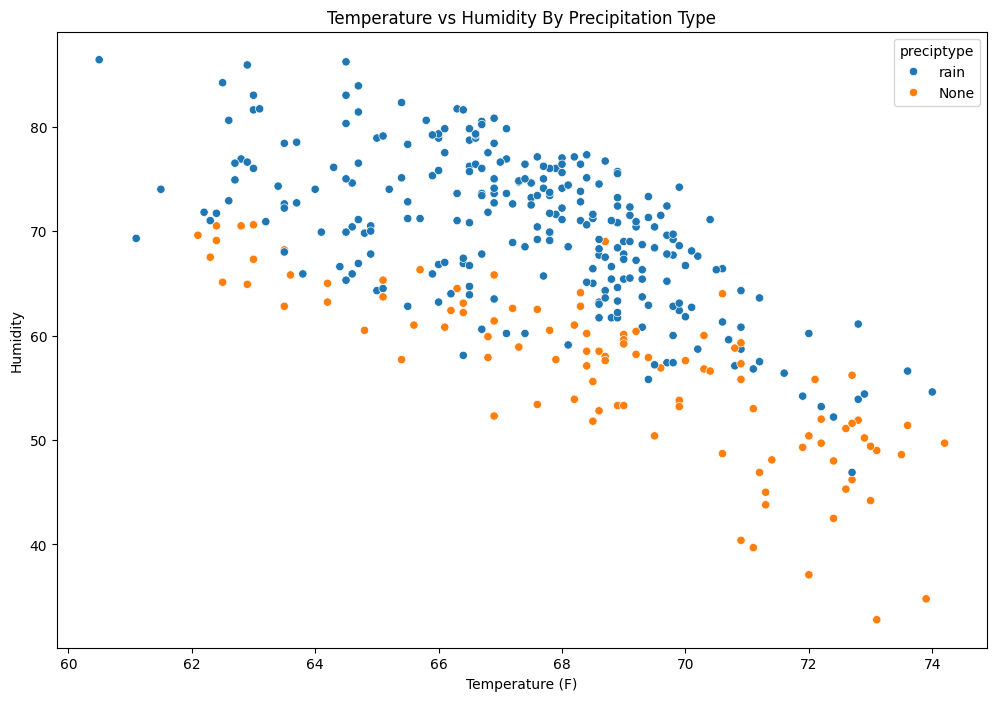

In [15]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'temp', y='humidity', hue = 'preciptype')
plt.title('Temperature vs Humidity By Precipitation Type')
plt.xlabel('Temperature (F)')
plt.ylabel('Humidity')
plt.show()


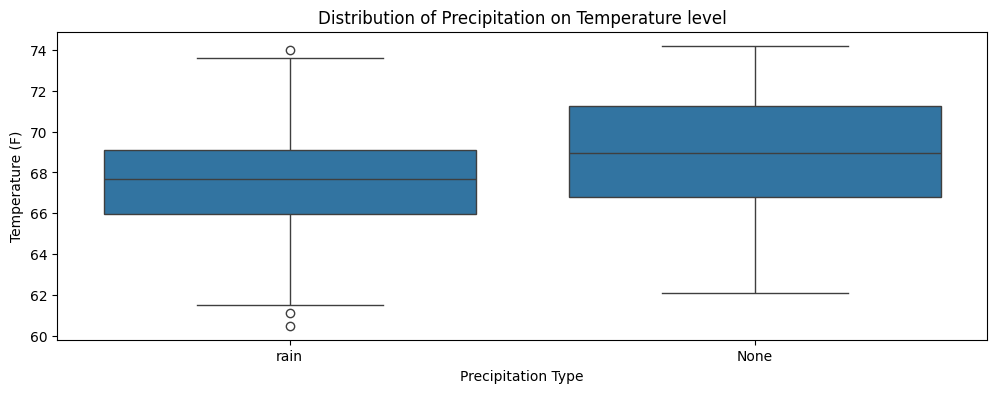

In [ ]:
plt.figure(figsize = (12, 4))
sns.boxplot(data=df, x = 'preciptype', y = 'temp')    # Boxplot of precipitation type vs temperature
plt.title('Distribution of Precipitation on Temperature level')
plt.xlabel('Precipitation Type')
plt.ylabel('Temperature (F)')
plt.show()


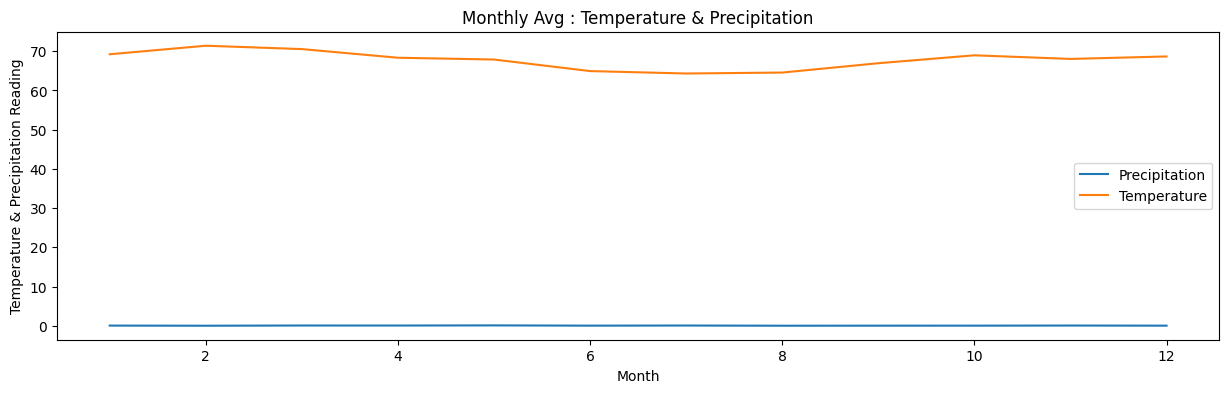

In [ ]:
df['month'] = df['datetime'].dt.month  # Extract month from datetime
plt.figure(figsize = (15, 4))
monthly_avg = df.groupby('month')[['temp', 'precip']].mean().reset_index()  # Monthly average temp and precip
sns.lineplot(data = monthly_avg, x = 'month', y = 'precip', label = 'Precipitation')   # Precipitation over months
sns.lineplot(data = monthly_avg, x = 'month', y = 'temp', label = 'Temperature')   # Temperature over months
plt.legend()
plt.title('Monthly Avg : Temperature & Precipitation')
plt.xlabel('Month')
plt.ylabel('Temperature & Precipitation Reading')
plt.show()


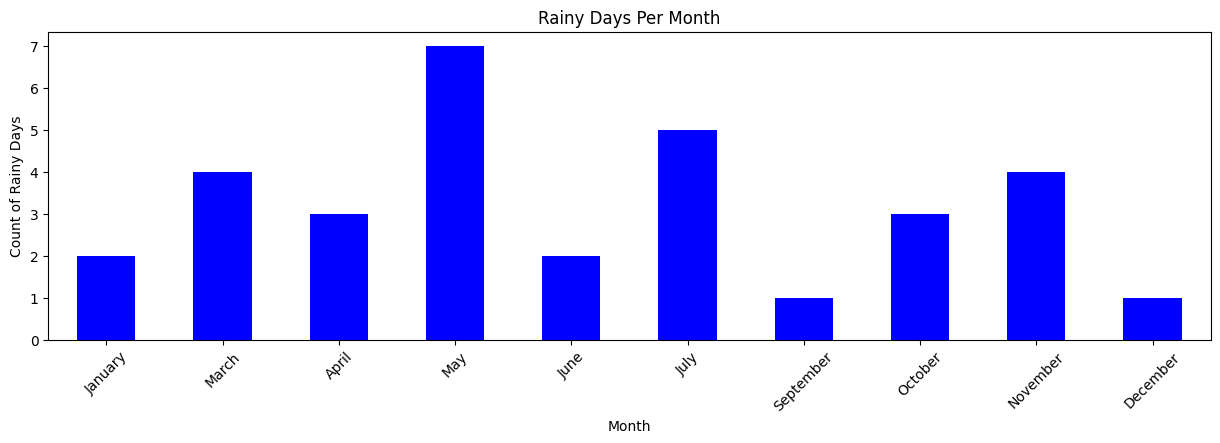

In [ ]:
df['is_rainy'] = df['precip'] > 0.1  # Define rainy days

rainy_days = df[df['is_rainy']].groupby('month').size()  # Count rainy days per month

rainy_days.index = [calendar.month_name[m] for m in rainy_days.index]  # Rename months using calendar.month_name
# Plot
plt.figure(figsize = (15, 4))
rainy_days.plot(kind='bar', color='blue')
plt.title("Rainy Days Per Month")
plt.xlabel("Month")
plt.ylabel("Count of Rainy Days")
plt.xticks(rotation=45)
plt.show();


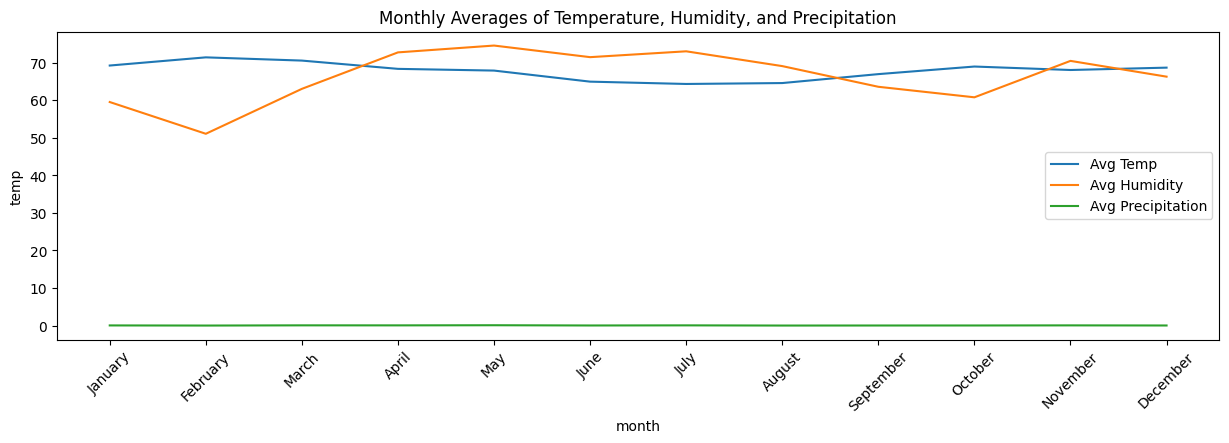

In [ ]:
monthly_avg = df.groupby('month')[['temp', 'humidity', 'precip']].mean().reset_index()  # Monthly averages
monthly_avg['month'] = monthly_avg['month'].apply(lambda x: calendar.month_name[x])  # Convert month number to name
plt.figure(figsize = (15, 4))
sns.lineplot(data=monthly_avg, x='month', y='temp', label='Avg Temp')
sns.lineplot(data=monthly_avg, x='month', y='humidity', label='Avg Humidity')
sns.lineplot(data=monthly_avg, x='month', y='precip', label='Avg Precipitation')
plt.xticks(rotation=45)
plt.title("Monthly Averages of Temperature, Humidity, and Precipitation")
plt.show()


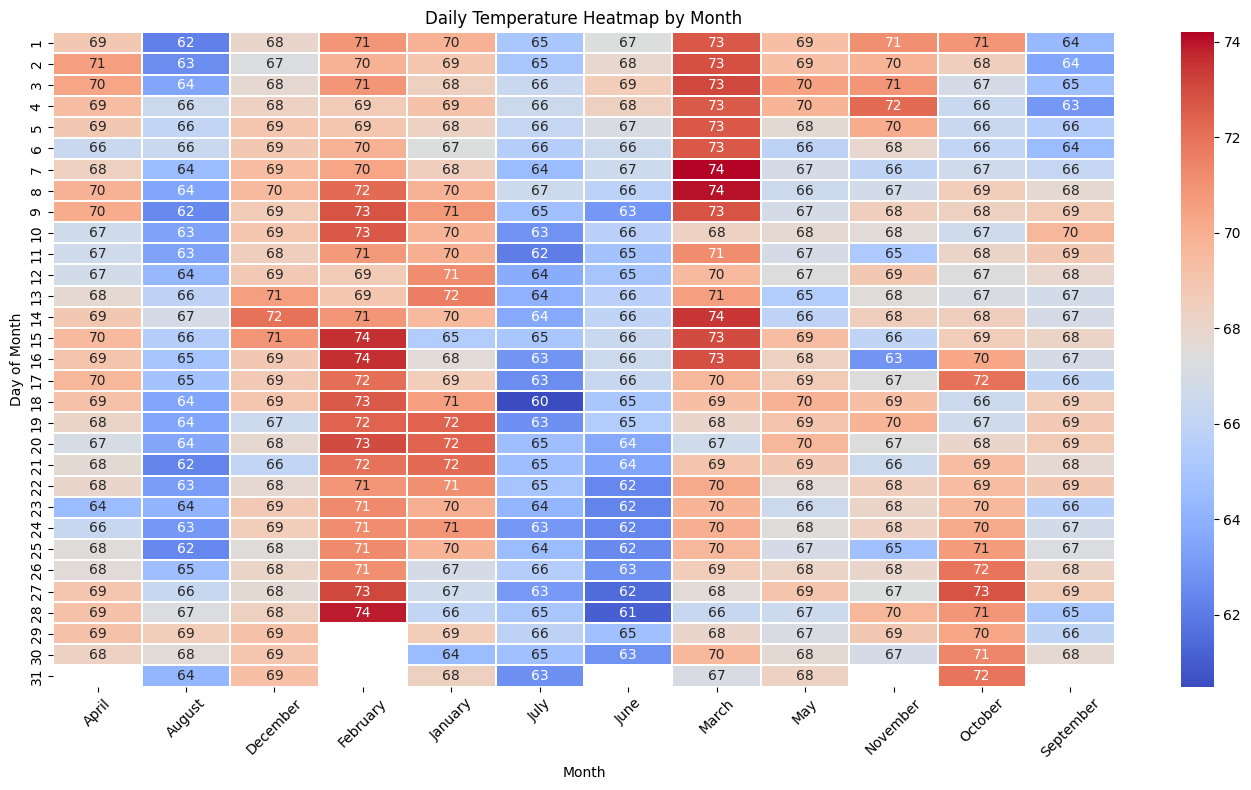

In [20]:

# Extract month name and day from datetime
df['month_name'] = df['datetime'].dt.month.apply(lambda x: calendar.month_name[x])
df['day'] = df['datetime'].dt.day

# Create pivot table
pivot = df.pivot_table(index='day', columns='month_name', values='temp')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.3, annot=True)
plt.title("Daily Temperature Heatmap by Month")
plt.xlabel("Month")
plt.ylabel("Day of Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


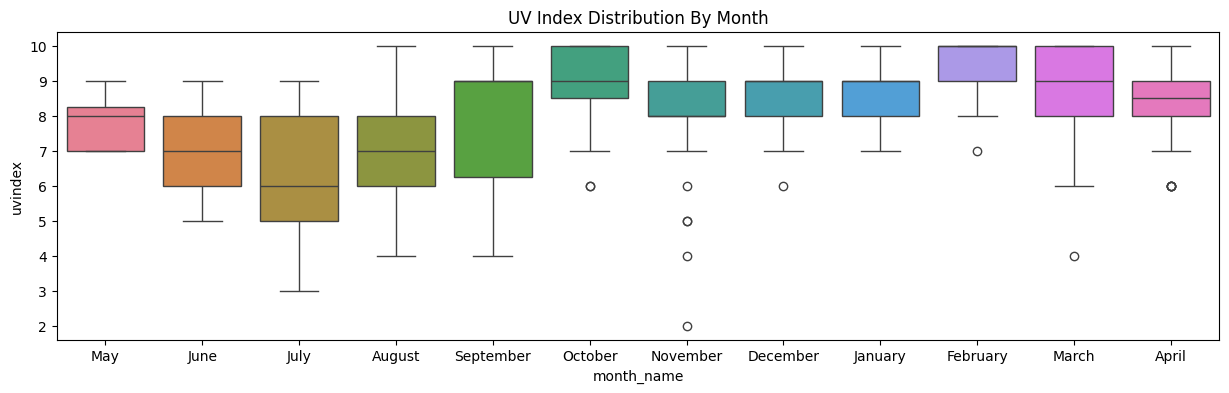

In [ ]:
plt.figure(figsize = (15, 4))
sns.boxplot(data = df, x = 'month_name', y = 'uvindex', hue = 'month_name')  # Boxplot of UV index by month
plt.title('UV Index Distribution By Month')
plt.show()


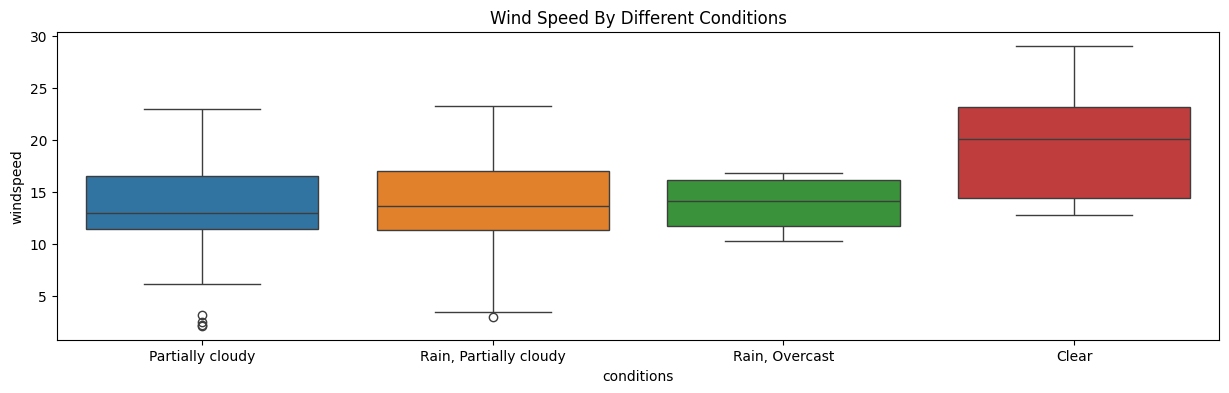

In [ ]:
plt.figure(figsize = (15, 4))
sns.boxplot(data =df, x = 'conditions', y = 'windspeed', hue = 'conditions')   # Boxplot of windspeed by conditions
plt.title('Wind Speed By Different Conditions')
plt.show()


The Days With The High Solar Radiation is : 37 days


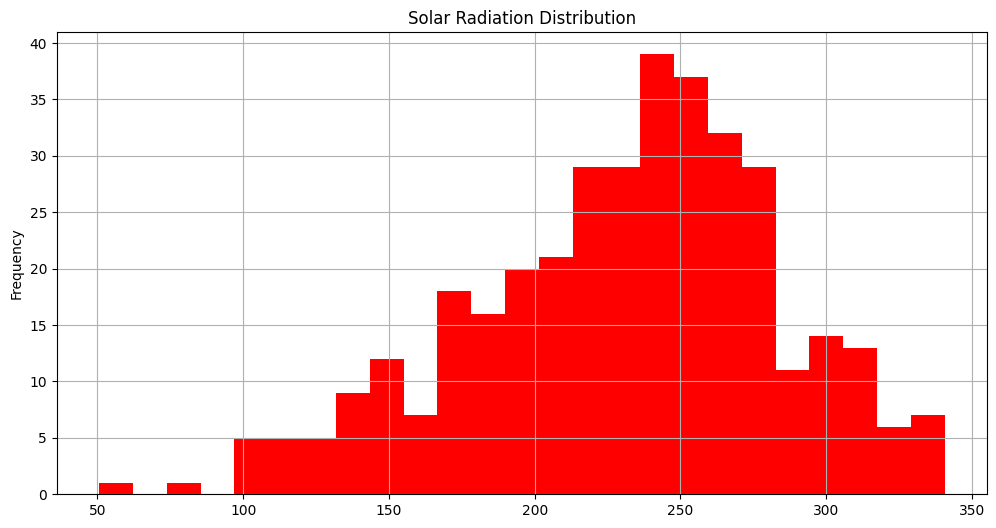

<Figure size 1200x500 with 0 Axes>

In [ ]:
high_solar = df[df['solarradiation'] > df['solarradiation'].quantile(0.9)]  # Days with high solar radiation
print(f'The Days With The High Solar Radiation is : {len(high_solar)} days')  

df['solarradiation'].plot(kind='hist', bins=25,figsize = (12, 6), title = 'Solar Radiation Distribution', color = 'red', grid=True)  # Histogram of solar radiation
plt.figure(figsize = (12, 5))
plt.show()


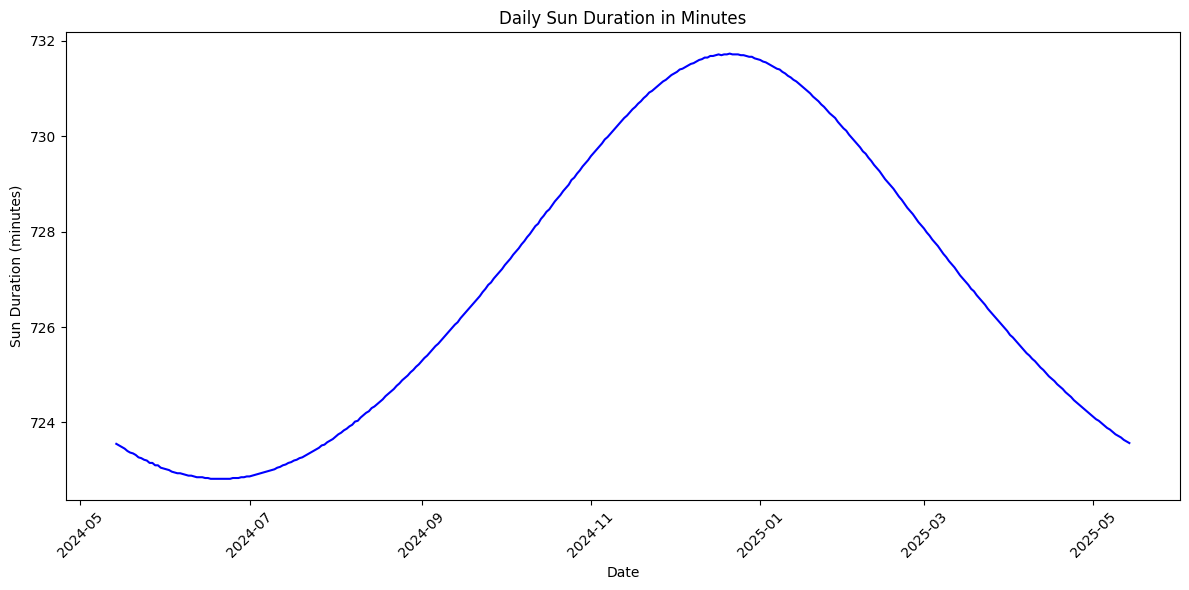

In [24]:

# Calculate sun duration in minutes
df['sun_duration_minutes'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 60

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='datetime', y='sun_duration_minutes', color='blue')
plt.title("Daily Sun Duration in Minutes")
plt.xlabel("Date")
plt.ylabel("Sun Duration (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



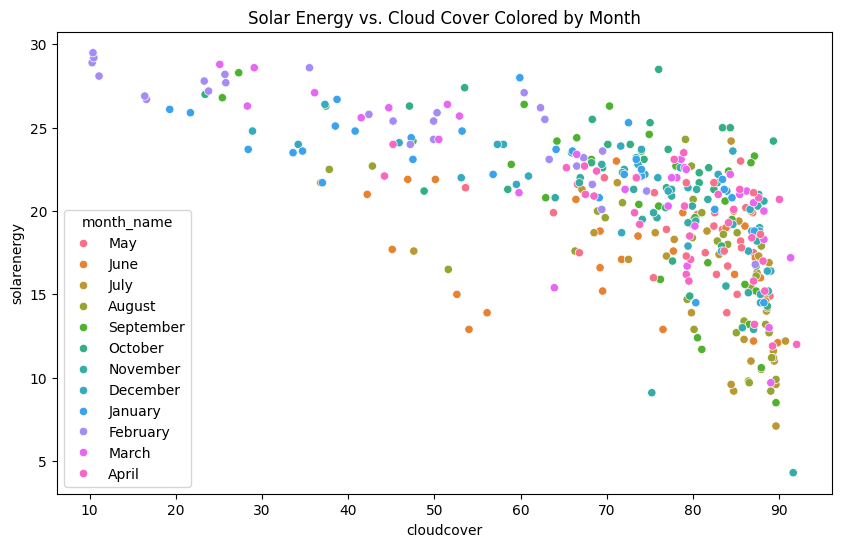

In [ ]:
## Cloud Cover vs. Solar Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cloudcover', y='solarenergy', hue='month_name',)  # Scatter plot colored by month
plt.title("Solar Energy vs. Cloud Cover Colored by Month")
plt.show()


**FEATURE ENINEERING**

In [ ]:
df['month'] = df['datetime'].dt.month  # Extract month from datetime
df['dayofweek'] = df['datetime'].dt.dayofweek # Extract day of week
df['sun_duration_minutes'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 60  # Calculate sun duration in minutes
df['high_uv'] = (df['uvindex']> 8).astype(int)  # High UV index flag


<Axes: title={'center': 'Distribution of Target Column'}, xlabel='high_uv'>

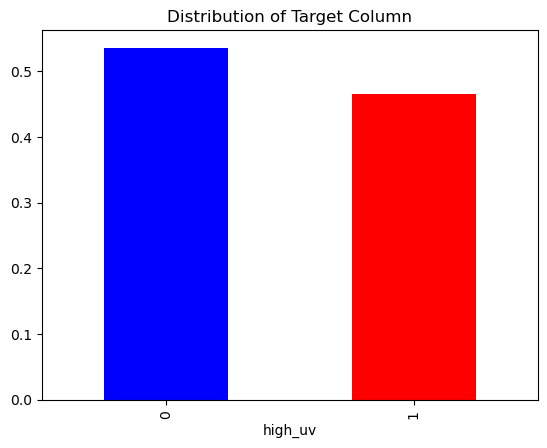

In [18]:
df['high_uv'].value_counts(normalize=True).plot(kind = 'bar', title = 'Distribution of Target Column', color = ['blue', 'red'])


**MODEL BUILDING**

In [20]:
# ***--------------------------------------------------------------***
# 6. MODEL PREPARATION
# ***--------------------------------------------------------------***
X = df[['temp', 'humidity', 'precip', 'solarradiation', 'cloudcover', 'sun_duration_minutes']]  # Features
y = df['high_uv']  # Target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Train-test split
scaler = StandardScaler()  # Standardize
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


**MODEL TRAINING AND EVALUATION**

In [ ]:
# ***--------------------------------------------------------------***
# 7. MODEL TRAINING & EVALUATION
# ***--------------------------------------------------------------***
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict
    print(f"Model: {name}")
    print(confusion_matrix(y_test, y_pred))  # Confusion matrix
    print(classification_report(y_test, y_pred))  # Metrics
    print("-" * 50)


Model: Logistic Regression
[[34  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.83      0.88      0.86        34

    accuracy                           0.86        74
   macro avg       0.86      0.87      0.86        74
weighted avg       0.87      0.86      0.87        74

--------------------------------------------------
Model: Random Forest
[[39  1]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.97      0.88      0.92        34

    accuracy                           0.93        74
   macro avg       0.94      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74

--------------------------------------------------
Model: XGBoost
[[35  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1   

**BEST MODEL**

[[39  1]
 [ 4 30]]
Accuracy: 0.93
Precision: 0.97
Recall: 0.88
ROC AUC: 0.93
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.97      0.88      0.92        34

    accuracy                           0.93        74
   macro avg       0.94      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



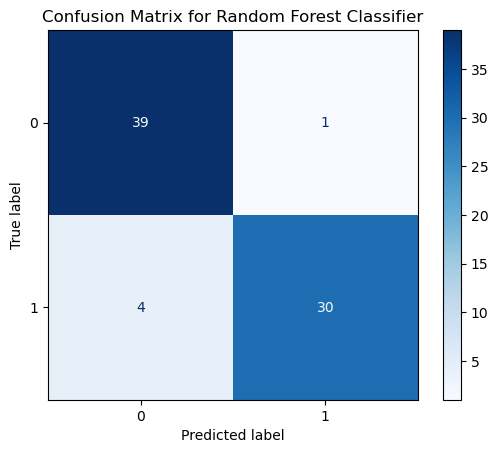

In [22]:
# Select best model (Random Forest) and save
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc:.2f}")
print(classification_report(y_test, y_pred))

# Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


**SAVE MODEL**

In [23]:
with open('nairobi_uv_model.pkl', 'wb') as f:
    pickle.dump((model), f)
